In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

### K최근접 이웃 모델
#### 지도학습 : 회귀 및 분류
특정 공간에서 데이터 포인트의 근접성을 기반으로 예측하는 비모수 알고리즘
* 회귀문제에서 예측 값은 k-nn의 대상 값의 평균


**프로세스**
1. 전체 교육 데이터 세트를 기억하고, 이를 사용해 새 데이터 포인트에 대한 예측 수행
2. 새 데이터 포인트가 모델에 제공되면, 유클리드 거리 또는 맨해튼 거리와 같은 거리 매트릭을 기반으로 k-nn을 찾음
3. 새 데이터 포인트는 k-nn의 다수 클래스를 기준으로 분류 (다수결)     
- k=1일 때, 그냥 하나의 값과 가까운 곳의 값으로 예측     

**k값의 선택**
- k값이 작으면, 데이터의 노이즈에 더 민감한 모델이 됨
- k값이 크면, 데이터의 전체 분포에 더 편향된 모델이 됨     
데이터 세트의 특성과 당면한 문제에 따라 신중한 선택 필요!

**장점**
- 이해하고 구현하기 쉬움
- 적은 수의 기능이 있는 데이터 세트에도 적합

**단점**
- 대규모 세트에서는 계산 비용이 많이 듬
- 메트릭이 선택과 k값의 영향을 받을 수 있음


**활용 사례**
1. 예측치 결정
2. 유전자 발현 분석 : RNA시퀀싱 데이터와 같은 고차원 데이터에서 활용
3. 얼굴 인식 : 유사한 특징을 가진 얼굴 찾기



In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [3]:
fish = pd.read_csv('실습 파일/fish.csv')
fish

,length,weight,target
0,25.4,242.0,Fish
1,26.3,290.0,Fish
2,26.5,340.0,Fish
3,29.0,363.0,Fish
4,29.0,430.0,Fish
5,29.7,450.0,Fish
6,29.7,500.0,Fish
7,30.0,390.0,Fish
8,30.0,450.0,Fish
9,30.7,500.0,Fish


<Axes: xlabel='length', ylabel='weight'>

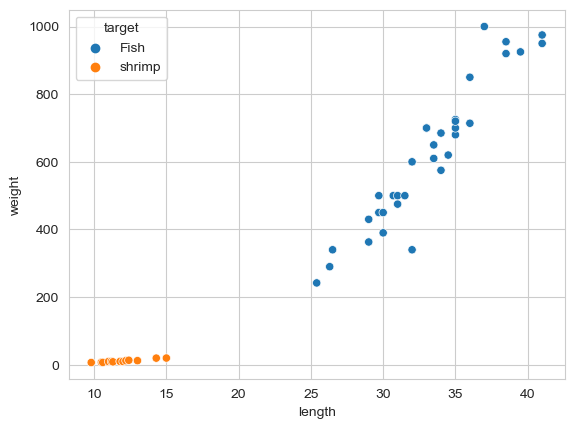

In [11]:
sns.set_style('whitegrid')
sns.scatterplot(data=fish, x='length',y = 'weight', hue='target')

In [14]:
# 문제집의 경우, 2차원 행렬
# 정답지의 경우, 1차원 행렬

# 현재의 data들은 전부다 행렬이 아님
# numpy array로 바꿔줘야함
data = fish[['length','weight']]
target = fish['target']

data = np.array(fish[['length','weight']])
target = np.array(fish['target'])

data

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


In [18]:
# 모델 생성
knn = KNeighborsClassifier()

# 학습
knn.fit(data, target)

KNeighborsClassifier()

In [19]:
# 예측
a = [40,400]
knn.predict([a])

array(['Fish'], dtype=object)

In [20]:
# 예측값
knn.predict(data)

array(['Fish', 'Fish', 'Fish', 'Fish', 'Fish', 'Fish', 'Fish', 'Fish',
       'Fish', 'Fish', 'Fish', 'Fish', 'Fish', 'Fish', 'Fish', 'Fish',
       'Fish', 'Fish', 'Fish', 'Fish', 'Fish', 'Fish', 'Fish', 'Fish',
       'Fish', 'Fish', 'Fish', 'Fish', 'Fish', 'Fish', 'Fish', 'Fish',
       'Fish', 'Fish', 'Fish', 'shrimp', 'shrimp', 'shrimp', 'shrimp',
       'shrimp', 'shrimp', 'shrimp', 'shrimp', 'shrimp', 'shrimp',
       'shrimp', 'shrimp', 'shrimp', 'shrimp'], dtype=object)

In [21]:
# 실제값
target

array(['Fish', 'Fish', 'Fish', 'Fish', 'Fish', 'Fish', 'Fish', 'Fish',
       'Fish', 'Fish', 'Fish', 'Fish', 'Fish', 'Fish', 'Fish', 'Fish',
       'Fish', 'Fish', 'Fish', 'Fish', 'Fish', 'Fish', 'Fish', 'Fish',
       'Fish', 'Fish', 'Fish', 'Fish', 'Fish', 'Fish', 'Fish', 'Fish',
       'Fish', 'Fish', 'Fish', 'shrimp', 'shrimp', 'shrimp', 'shrimp',
       'shrimp', 'shrimp', 'shrimp', 'shrimp', 'shrimp', 'shrimp',
       'shrimp', 'shrimp', 'shrimp', 'shrimp'], dtype=object)

In [24]:
# data와 예측한 결과와 target을 비교해라
knn.score(data, target)

1.0

### 훈련데이터 / 시험데이터
정답은 없지만, 훈련데이터에 쏟아야 한다는 것!

- 만약 데이터가 100만개라면? 99만:1만

- 물론, 데이터가 적다면? (권고사항)

    - sklearn = 75 : 25
    - google = 8 : 2


- 8대 2로 구분했다면,,,      
8 속의 새우와 생선이 6대4라면,,, 2 속에서도 6대 4가 나오는 게 좋은데..             
train_test_split은 자동으로 저렇게 만들어주는 함수


In [27]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(data, target, test_size = 0.2)

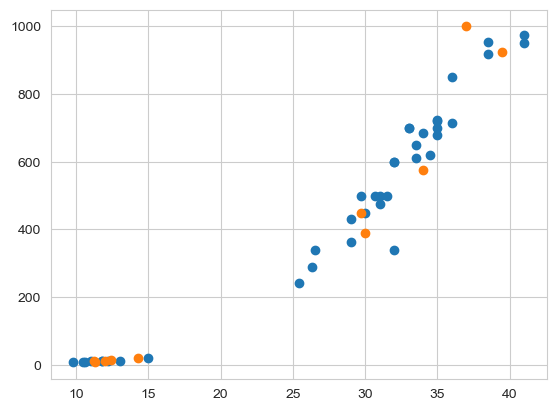

In [31]:
import matplotlib.pyplot as plt

plt.scatter(train_x[:,0], train_x[:,1])
plt.scatter(test_x[:,0], test_x[:,1])

plt.grid(True)
plt.show()

In [32]:
knn = KNeighborsClassifier()
knn.fit(train_x, train_y)

KNeighborsClassifier()

In [33]:
# 실제값
test_y

array(['Fish', 'Fish', 'shrimp', 'shrimp', 'Fish', 'Fish', 'shrimp',
       'shrimp', 'shrimp', 'Fish'], dtype=object)

In [34]:
# 예측값
knn.predict(test_x)

array(['Fish', 'Fish', 'shrimp', 'shrimp', 'Fish', 'Fish', 'shrimp',
       'shrimp', 'shrimp', 'Fish'], dtype=object)

In [35]:
knn.score(test_x, test_y)

1.0

In [37]:
# 틀림! 신뢰할만한 모델이 아님~~
a = [25, 150]
knn.predict([a])

array(['shrimp'], dtype=object)

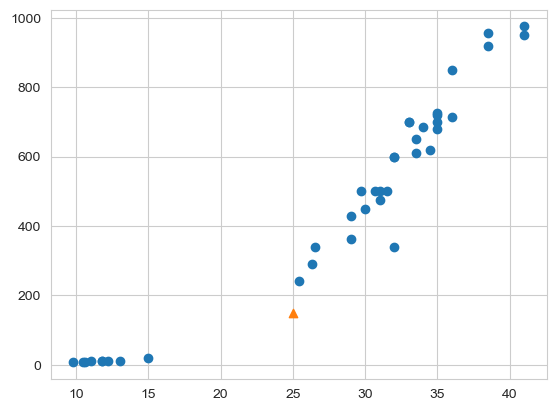

In [48]:
plt.scatter(train_x[:,0], train_x[:,1])
plt.scatter(25, 150, marker = '^')
# plt.scatter(test_x[:,0], test_x[:,1])

plt.grid(True)
plt.show()

In [41]:
distance, idx = knn.kneighbors([[25,150]])

In [44]:
#(25, 150)와 길이가 가까운 곳의 값들의 위치
idx

array([[ 3, 16, 25, 18, 34]], dtype=int64)

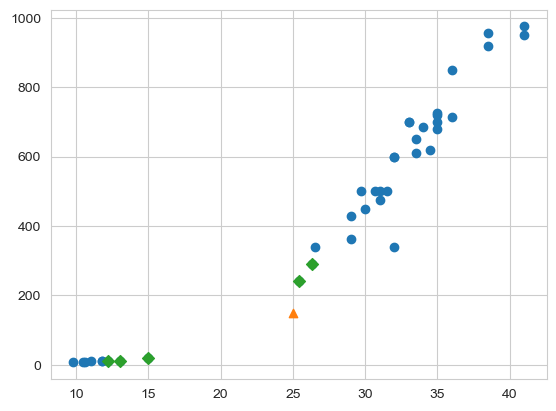

In [50]:
plt.scatter(train_x[:,0], train_x[:,1])
plt.scatter(25, 150, marker = '^')
plt.scatter(train_x[idx,0], train_x[idx,1], marker='D')

plt.grid(True)
plt.show()

우리 눈에는 생선이 더 가까워 보이지만,,,           
x와 y의 단위의 차이가 5와 200 이라서 그럼!

그래서 숫자만 봤을 때, 길이 데이터를 무시하고 진행된 것

> **이 모델은 잘못 측정된 알고리즘임**

In [54]:
# 평균 0, 표준편차 1로

mean =  train_x.mean(axis=0)
std =  train_x.std(axis=0)

train_scaled = (train_x - mean)/std
test_scaled = (test_x - mean)/std

- 시험 데이터도 훈련데이터의 평균과 표준편차로 사용하는 게 맞나용?!?!
    - 모른다고 가정하고 시험데이터를 만들었기 때문에!
    - 실제로 모르는 데이터의 평균은 모르니깐
    - 자신이 학습한걸 기준으로 학습하기 때문에
    - 시험 데이터에도 훈련데이터의 값들을 활용하는 것

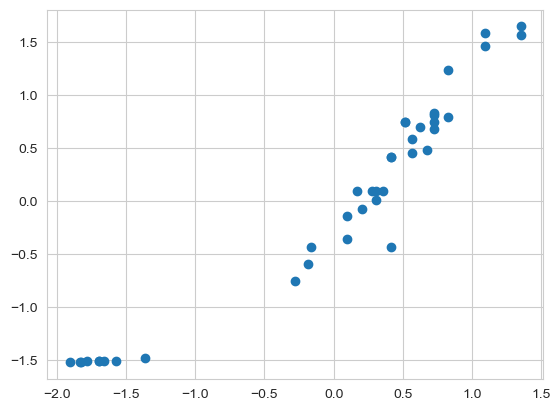

In [55]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])

In [56]:
knn = KNeighborsClassifier()
knn.fit(train_scaled, train_y)

KNeighborsClassifier()

In [58]:
knn.score(test_scaled, test_y)

1.0

정규화까지 진행했기 때문에, 이제 신뢰할 만한 알고리즘!     

- 그래도 태클을 건다며언~~
    - 평균의 이상치가 있는지 확인해야함!
    - 데이터의 갯수가 49개로 신뢰할만하다고 하기에는 적은 편


<Axes: >

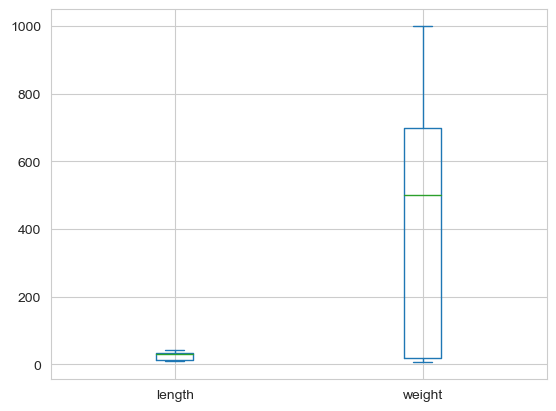

In [59]:
# 이상치 파악하기 쉬움
fish.plot.box()

In [60]:
a = ([25,150]-mean)/std
knn.predict([a])

array(['Fish'], dtype=object)

In [61]:
disctance, idx = knn.kneighbors([a])
distance, idx

(array([[ 92.00086956, 130.48375378, 138.32150953, 138.39320793,
         140.00603558]]),
 array([[ 3, 34, 38, 22, 23]], dtype=int64))

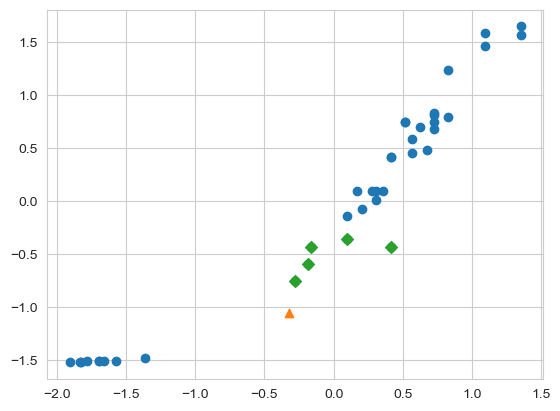

In [62]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(a[0],a[1], marker = '^')
plt.scatter(train_scaled[idx,0], train_scaled[idx,1], marker='D')

plt.grid(True)
plt.show()

#### 어떻게 하면 더 성능을 올릴 수 있을까? (위의 데이터 말공,,)
현재 그래프에서 나타난 값이 5개인데, 과연 5개가 최적인 것인가?!           

데이터마다 다르기 때문에, k값을 시뮬레이션을 돌려서 확인해야 함!         
원랜 5개가 기본값

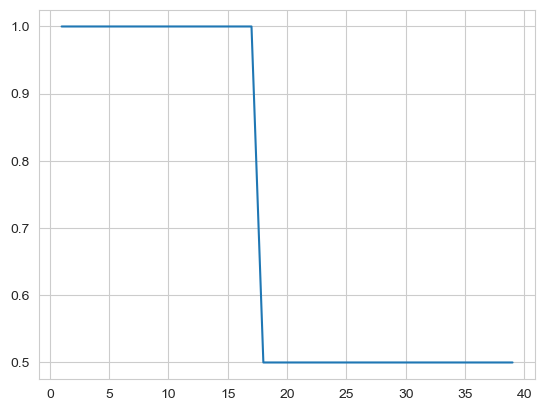

In [64]:
knn = KNeighborsClassifier()
knn.fit(train_scaled, train_y)
box = []

for n in range(1,40):
    knn.n_neighbors = n
    box.append(knn.score(test_scaled, test_y))
    
plt.plot(range(1,40), box)

In [ ]:
# 최적의 n값을 찾았으면
# 그 n값을 넣어서 다시 생성해서 만들거나 
knn = KNeighborsClassifier(n_neighbors=10)

# n값을 다시 설정해주기
knn.n_neighbors = 10

##### fish2.csv 로 풀기

In [66]:
df = pd.read_csv('실습 파일/fish2.csv')
df

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [87]:
data = df.iloc[:,1].to_numpy()
target = df['Species'].to_numpy()

In [88]:
data = np.array(df[['Weight','Length','Diagonal','Height','Width']])
target = np.array(df['Species'])

data

array([[2.42000e+02, 2.54000e+01, 3.00000e+01, 1.15200e+01, 4.02000e+00],
       [2.90000e+02, 2.63000e+01, 3.12000e+01, 1.24800e+01, 4.30560e+00],
       [3.40000e+02, 2.65000e+01, 3.11000e+01, 1.23778e+01, 4.69610e+00],
       [3.63000e+02, 2.90000e+01, 3.35000e+01, 1.27300e+01, 4.45550e+00],
       [4.30000e+02, 2.90000e+01, 3.40000e+01, 1.24440e+01, 5.13400e+00],
       [4.50000e+02, 2.97000e+01, 3.47000e+01, 1.36024e+01, 4.92740e+00],
       [5.00000e+02, 2.97000e+01, 3.45000e+01, 1.41795e+01, 5.27850e+00],
       [3.90000e+02, 3.00000e+01, 3.50000e+01, 1.26700e+01, 4.69000e+00],
       [4.50000e+02, 3.00000e+01, 3.51000e+01, 1.40049e+01, 4.84380e+00],
       [5.00000e+02, 3.07000e+01, 3.62000e+01, 1.42266e+01, 4.95940e+00],
       [4.75000e+02, 3.10000e+01, 3.62000e+01, 1.42628e+01, 5.10420e+00],
       [5.00000e+02, 3.10000e+01, 3.62000e+01, 1.43714e+01, 4.81460e+00],
       [5.00000e+02, 3.15000e+01, 3.64000e+01, 1.37592e+01, 4.36800e+00],
       [3.40000e+02, 3.20000e+01, 3.73

<Axes: >

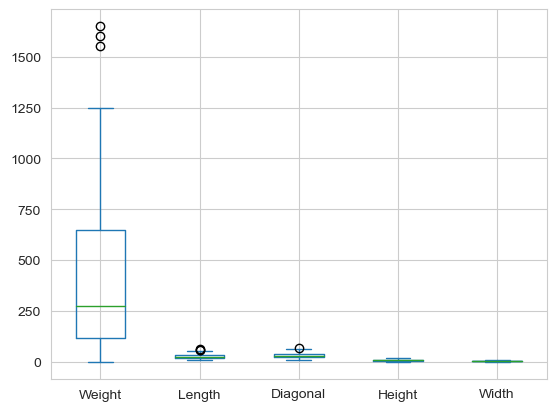

In [89]:
df.plot.box()

# 이상치가 기존의 데이터에 큰 영향을 주지 않을 정도의 벗어남이라서
# 괜춘 그냥 포함해서 하느넛

In [90]:
train_x, test_x, train_y, test_y = train_test_split(data, target, test_size = 0.2)

In [91]:
mean =  train_x.mean(axis=0)
std =  train_x.std(axis=0)

train_scaled = (train_x - mean)/std
test_scaled = (test_x - mean)/std

In [92]:
knn = KNeighborsClassifier()
knn.fit(train_scaled, train_y)

KNeighborsClassifier()

In [93]:
knn.score(test_scaled, test_y)

0.9375

1 0.84375
2 0.9375
3 0.90625
4 0.9375
5 0.9375
6 0.90625
7 0.90625
8 0.875
9 0.875
10 0.875
11 0.84375
12 0.84375
13 0.84375
14 0.8125
15 0.8125
16 0.8125
17 0.8125
18 0.8125
19 0.75
20 0.75
21 0.71875
22 0.6875
23 0.6875
24 0.6875
25 0.71875
26 0.71875
27 0.71875
28 0.71875
29 0.71875
30 0.6875
31 0.625
32 0.625
33 0.59375
34 0.59375
35 0.5625
36 0.5625
37 0.53125
38 0.53125
39 0.53125


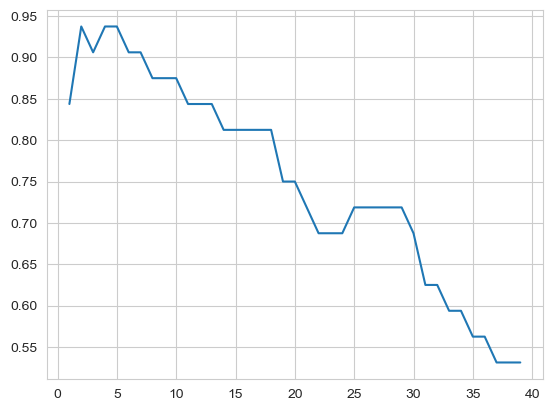

In [94]:
knn = KNeighborsClassifier()
knn.fit(train_scaled, train_y)
box = []

for n in range(1,40):
    knn.n_neighbors = n
    box.append(knn.score(test_scaled, test_y))
    print(n, knn.score(test_scaled, test_y))
    
plt.plot(range(1,40), box)

In [95]:
box.index(max(box))+1

2

In [96]:
knn.n_neighbors = 2

C:\Users\campus2H018\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


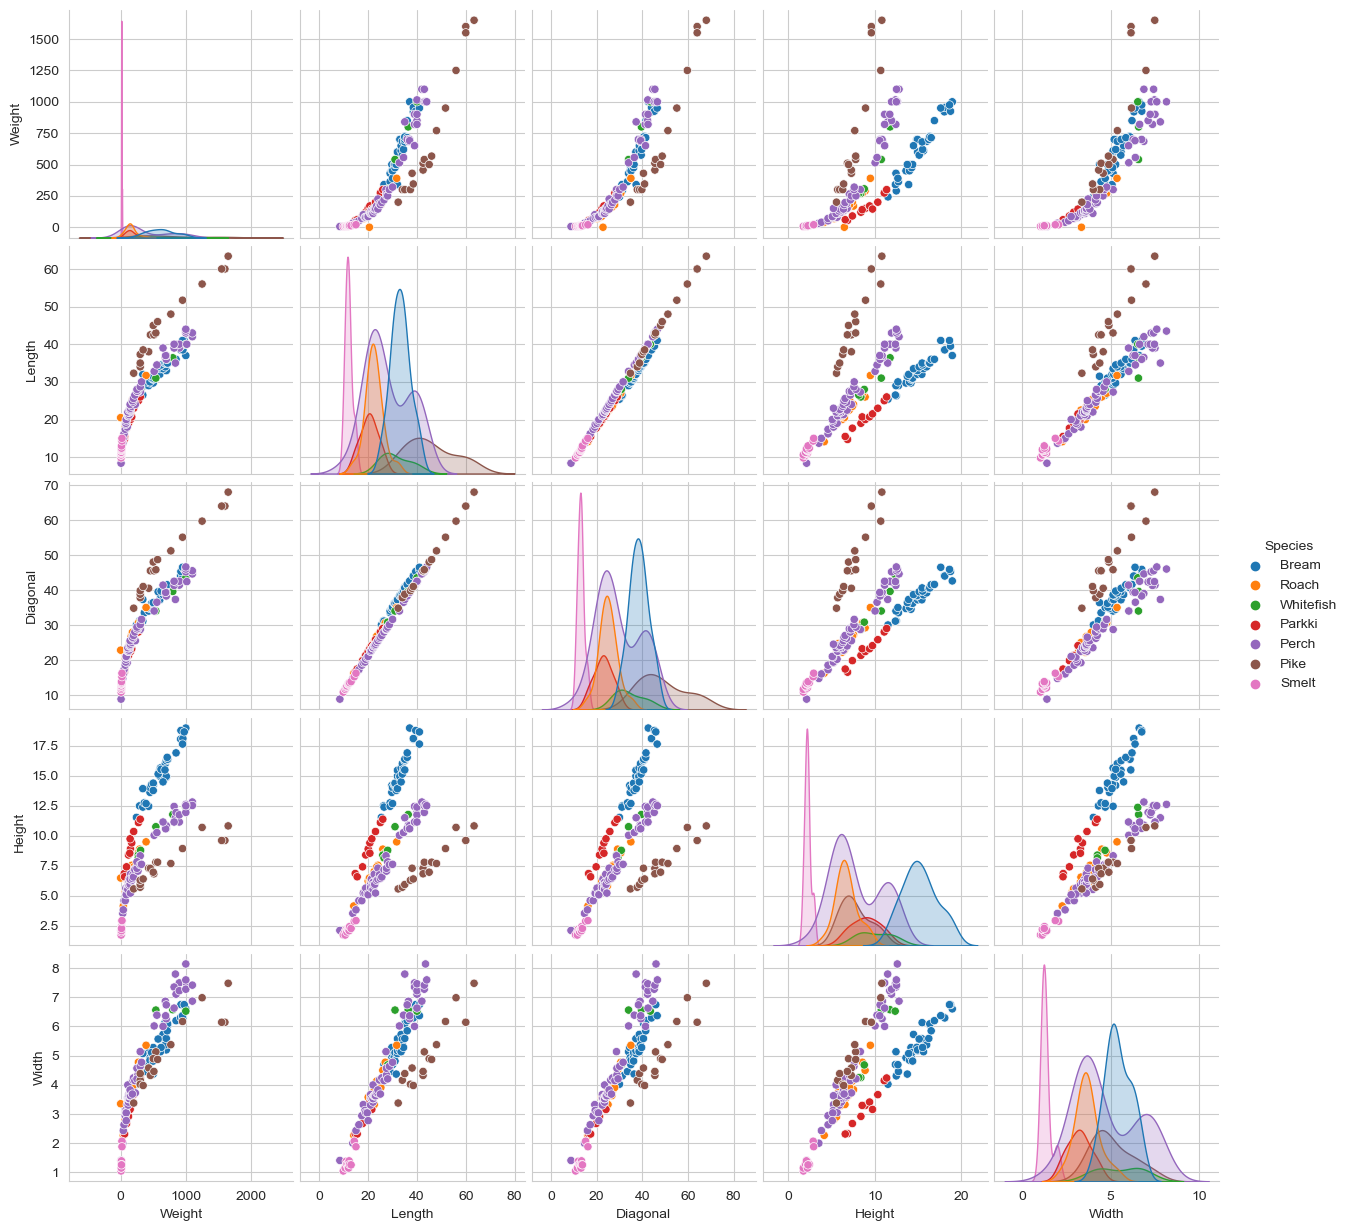

In [97]:
sns.pairplot(df, hue='Species')

In [98]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(train_scaled, train_y)
knn.score(test_scaled, test_y)

0.9375

In [133]:
df1 = pd.read_csv('실습 파일/01_Data.csv')
df1['State'].unique()

array(['계약확정', '기간만료', '해약확정', '해약진행중'], dtype=object)

In [134]:
#해약여부
df1['해약여부'] = df1['State'].replace({"계약확정": 0 ,"기간만료":1,"해약확정":1, "해약진행중":1})

In [135]:
df1['해약여부'].value_counts()

해약여부
0    50620
1      681
Name: count, dtype: int64

In [136]:
df2 = df1.dropna()

In [174]:
data = df2[['Age','Credit_Rank','Amount_Month','Term']].to_numpy()
target = df2['해약여부'].to_numpy()

train_x, test_x, train_y, test_y = train_test_split(data, target, test_size = 0.2)

mean = train_x.mean(axis=0)
std = train_x.std(axis=0)

train_scaled=(train_x-mean)/std
test_scaled=(test_x-mean)/std

knn = KNeighborsClassifier()
knn.fit(train_scaled, train_y)

box = []
for n in range(1,101):
    knn.n_neighbors=n
    score = knn.score(test_scaled, test_y)
    box.append(score)

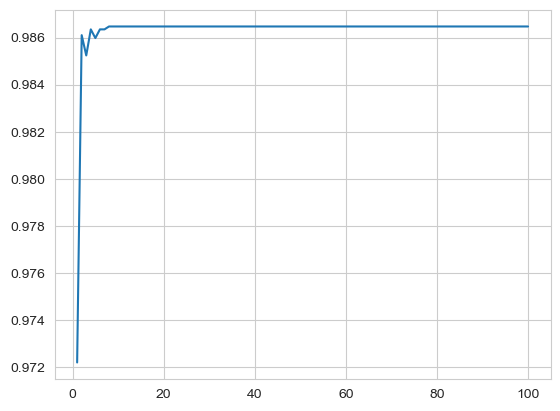

In [175]:
# 데이터가 불균형해서 점점 낮아지는 것이 아님! 그냥 무지성 0 찍는 것 같은 그런겨
plt.plot(range(1,101),box)
plt.show()

### 혼합행렬
- 정확도 : 컴퓨터가 예측한 것과 실제값을 비교
- 정밀도 : precision_score
    - 긍정이라고 예측한 것들 중에 실제로 긍정인 것의 비욜 
    - 주로 주식할 때 사용
- 재현율 : recall_score
    - 실제 긍정인 것들 중에서 긍정이라고 예측한 것의 비율
    - 환자 데이터에 많이 사용! 암환자냐 아니냐
    - 실제 암환자 10명//100 명 
    - 절대 틀리면 안되는 경우

In [176]:
# 정확도
knn.score(test_scaled, test_y)

0.986469864698647

In [177]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score

In [178]:
pred = knn.predict(test_scaled)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [179]:
precision_score(test_y,pred)

0.0

In [180]:
recall_score(test_y,pred)

C:\Users\campus2H018\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [181]:
confusion_matrix(test_y,pred)

array([[8020,  110],
       [   0,    0]], dtype=int64)

In [182]:
# 임계값 설명
# 0.5 보다 크면 1, 0.5보다 작으면 0
knn.predict_proba(test_scaled)

array([[1.  , 0.  ],
       [0.88, 0.12],
       [0.98, 0.02],
       ...,
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ]])

In [183]:
pred = []
for i in knn.predict_proba(test_scaled):
    if i[1]>0.15:
        pred.append(1)
    else : 
        pred.append(0)


In [184]:
precision_score(pred, test_y)  # 임계값을 0.2로 낮워놔서 그럼!

0.05454545454545454

In [185]:
recall_score(pred, test_y)

0.14285714285714285

In [186]:
# 정밀도랑 재현율을 평균
# 확실하게 잘 만드는 게 아니면 같이 커지는게 아니
f1_score(pred, test_y)

0.07894736842105263

In [187]:
# 임계값을 설정하는 방법
from sklearn.metrics import precision_recall_curve

pred = knn.predict_proba(test_scaled)[:,1]

# 정밀도, 재현율, 임계값
precisions, recalls, thresholds = precision_recall_curve(test_y, pred)

sample = pd.DataFrame()
sample['precisions'] = precisions[:-1]
sample['recalls'] = recalls[:-1]
sample['thresholds'] = thresholds
sample

,precisions,recalls,thresholds
0,0.013530,1.000000,0.00
1,0.020235,0.781818,0.01
2,0.035506,0.663636,0.02
3,0.066749,0.490909,0.03
4,0.094262,0.418182,0.04
5,0.101655,0.390909,0.05
6,0.110236,0.381818,0.06
7,0.112299,0.381818,0.07
8,0.111111,0.354545,0.08
9,0.118182,0.354545,0.09


In [188]:
sample2 = pd.melt(sample, id_vars='thresholds')
sample2

,thresholds,variable,value
0,0.00,precisions,0.013530
1,0.01,precisions,0.020235
2,0.02,precisions,0.035506
3,0.03,precisions,0.066749
4,0.04,precisions,0.094262
5,0.05,precisions,0.101655
6,0.06,precisions,0.110236
7,0.07,precisions,0.112299
8,0.08,precisions,0.111111
9,0.09,precisions,0.118182


<Axes: xlabel='thresholds', ylabel='value'>

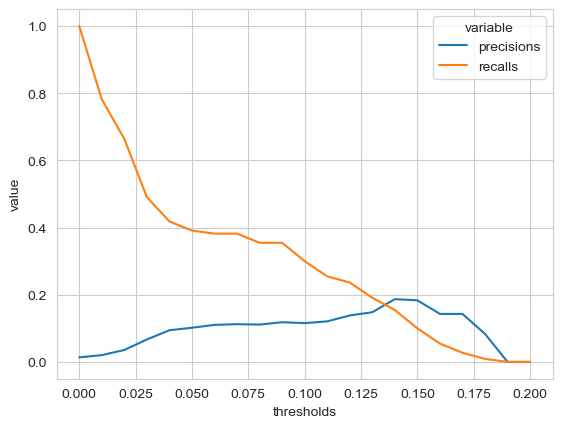

In [189]:
# 임계값
# 0이냐 1이냐 구분할 때 최적의 확률 비율

# knn가 100개로 되어 있움
# 마지막 알고리즘 결과.. 그렇게 되어 있슈
# 그래서 임계값이 별로다
# 몇 개가 임계값으로 잡혀있는지에 대한 그래프라서..?
sns.lineplot(data=sample2, x='thresholds', y='value', hue='variable')

In [196]:
sample2.sort_values('value')

,thresholds,variable,value
20,0.20,precisions,0.000000
40,0.19,recalls,0.000000
19,0.19,precisions,0.000000
41,0.20,recalls,0.000000
39,0.18,recalls,0.009091
0,0.00,precisions,0.013530
1,0.01,precisions,0.020235
38,0.17,recalls,0.027273
2,0.02,precisions,0.035506
37,0.16,recalls,0.054545


#### ROC Curve : 이진분류 모델 성능평가

In [190]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(test_y, pred)

In [191]:
sample = pd.DataFrame()
sample['FPR'] = fpr
sample['TPR'] = tpr
sample['thresholds'] = thresholds
sample

,FPR,TPR,thresholds
0,0.000000,0.000000,inf
1,0.000374,0.000000,0.20
2,0.000499,0.000000,0.19
3,0.001372,0.009091,0.18
4,0.002244,0.027273,0.17
5,0.004489,0.054545,0.16
6,0.006110,0.100000,0.15
7,0.009227,0.154545,0.14
8,0.015087,0.190909,0.13
9,0.020200,0.236364,0.12


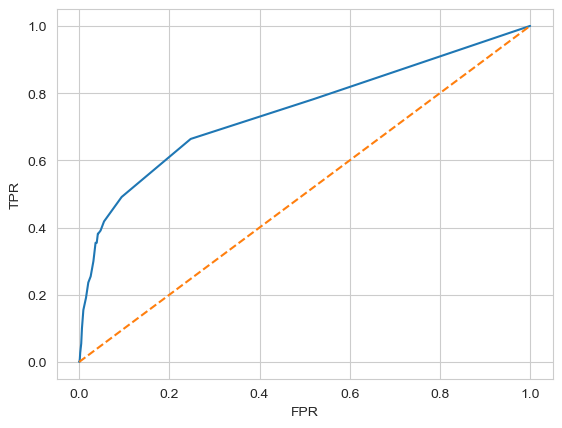

In [192]:
# FPR : 거짓인데 긍정으로 예측한 것
# TPR : 긍정인데 긍정이라고 예측한 것

plt.plot(sample['FPR'], sample['TPR'])
plt.plot([0,1],[0,1],linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.show()

In [193]:
# 적분된 값
roc_auc_score(test_y, pred)

0.7455701654953526

### 트리 기반 : 결정 트리(randomforest, XGBoost)
스무고개 처럼 질문을 하면서 분류


- 비정형 데이터 : 딥러닝 
- 정형 데이터 : 상황에 따라 다름! 하지만, 대부분의 경우, 트리 기반
    - 머신러닝 경연 대회에서 95%가 트리 기반임     
    
- 장점 
    1. 성능이 좋다
    2. 쉽다. (표준화이나 분할이나 다 필요없음!)
    3. 데이터의 설명력을 가질 수 있음
        - 레드와 화이트 와인 구분할 때, 알코올 도수, 당도, 향 등의 변수가 있다고 했을때,
        - 트리기반은 알코올 도수가 몇도이상, 당도가 몇 이상, 향이 어떨 때 화이트 와인이다 처럼 설명할 수 있음

In [199]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [201]:
data = iris.iloc[:,:-1].to_numpy()
target = iris['species'].to_numpy()

# 질문하면서 진행하기 때문에 표준화를 하면 설명력을 잃어 버림
# 고래서 표준화를 진행할 필요가 없음
# 해준다고 해서 성능이 좋아지지도 않아서 고냥 패스
# 그래도 학습 속도를 높이려면 표준화를 해야되긴 함. 하지만 설명력을 잃겠징

train_x, test_x, train_y, test_y = train_test_split(data, target, test_size= 0.2)

dt = DecisionTreeClassifier()
dt.fit(train_x, train_y)

DecisionTreeClassifier()

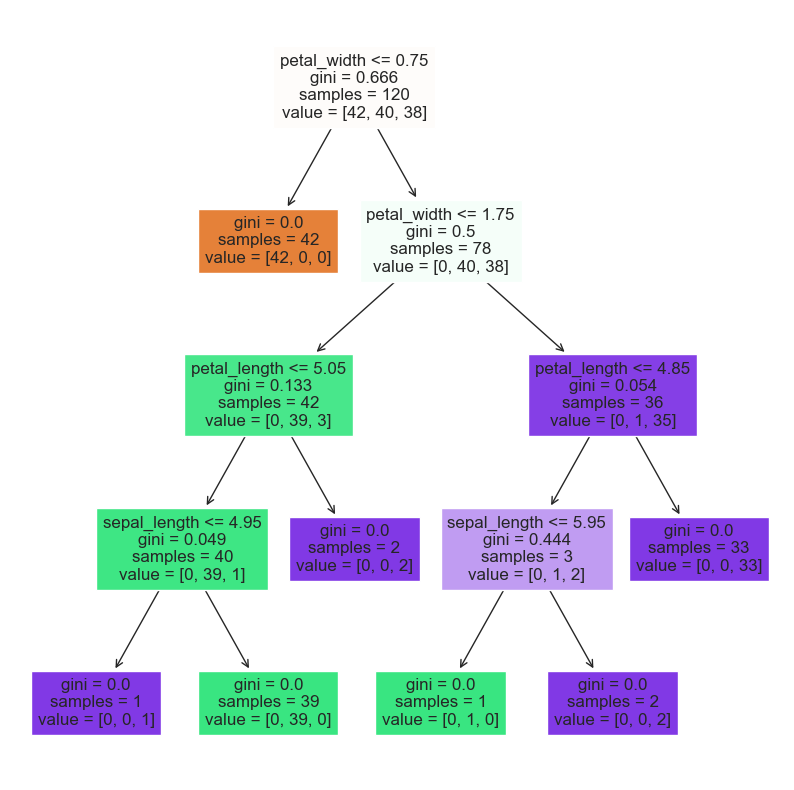

In [208]:
plt.figure(figsize=(10,10))
plot_tree(dt, filled=True, feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
plt.show()

# petal_width가 0.75보다 작으면 무조건 setosa다


### 랜덤포레스트
- 랜덤포레스트는 결정트리보다 좋을 수 밖에 없음! 왜냐, 결정트리 100개를 모아둔 것이여
- 데이터 분할도 필요없엉! 고냥 한 번에 싹 다 넣으면 된당
- 기존에는 train과 test를 구분해서 사용하니깐, test를 학습할 수 없었는데, 얘는 전부다 사용할 수 있음


장점 1. 완벽하게 학습하지 않는다, 
- ex) 만 개가 있으면, 오천개만 가지고 학습함. 
- 특성도 4가지가 있다면 ,2개만 가지고도 학습할 수도 있고,,, 
- 너무 fit하게 분류해서 추가한 값이 제대로 안 나올 수 있는데 얜 적당히 해서

In [210]:
from sklearn.ensemble import RandomForestClassifier

iris = sns.load_dataset('iris')

data = iris.iloc[:,:-1].to_numpy()
target = iris['species'].to_numpy()

# oob_score는 사용하지 않은 트리들로 평가하겠다는 것
rf = RandomForestClassifier(oob_score=True)
rf.fit(data, target)

RandomForestClassifier(oob_score=True)

In [211]:
# 100개의 나무가 각각 평가한 값을 평균 낸 것.
# 랜덤포레스트의 정확도를 확인할 수 있는 값
rf.oob_score_

0.96

In [212]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [213]:
a = [5, 4, 1.5, 0.3]
rf.predict([a])

array(['setosa'], dtype=object)